# Import Libraries

In [23]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [24]:
df = pd.read_csv('Train.csv')
df.sample(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
5595,5596,B,Road,5,1,113,3,medium,F,6,5509,1
4384,4385,C,Flight,3,3,134,2,high,M,1,5646,0
4654,4655,C,Flight,2,5,271,2,low,F,5,5164,1
3096,3097,D,Ship,2,3,188,2,high,M,25,2033,1
9802,9803,C,Ship,4,2,204,3,medium,F,3,4001,0
445,446,F,Ship,4,4,189,2,medium,F,18,2955,1
211,212,F,Ship,2,5,154,3,low,F,21,1113,1
4143,4144,B,Ship,3,4,122,3,high,F,10,4880,0
9196,9197,C,Ship,5,5,262,5,low,M,2,1304,0
9101,9102,F,Ship,5,3,223,5,medium,M,4,1817,0


In [25]:
# Rename column
df = df.rename(columns={'Warehouse_block':'Warehouse','Mode_of_Shipment':'Shipment','Customer_care_calls':'Calls',
                        'Customer_rating':'Rating','Cost_of_the_Product':'Cost','Product_importance':'Importance',
                        'Discount_offered':'Discount','Weight_in_gms':'Weight_gram','Reached.on.Time_Y.N':'Late'})
df.head()

,ID,Warehouse,Shipment,Calls,Rating,Cost,Prior_purchases,Importance,Gender,Discount,Weight_gram,Late
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [26]:
# informasi general tentang dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               10999 non-null  int64 
 1   Warehouse        10999 non-null  object
 2   Shipment         10999 non-null  object
 3   Calls            10999 non-null  int64 
 4   Rating           10999 non-null  int64 
 5   Cost             10999 non-null  int64 
 6   Prior_purchases  10999 non-null  int64 
 7   Importance       10999 non-null  object
 8   Gender           10999 non-null  object
 9   Discount         10999 non-null  int64 
 10  Weight_gram      10999 non-null  int64 
 11  Late             10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Pengamatan:
1. Data terdiri dari 10999 baris
2. Tampak tidak terdapat kolom yang memiliki null/missing values (Non-Null Count pada setiap kolom bernilai 10999)
3. Sepertinya tidak ada issue yang mencolok pada tipe data untuk setiap kolom (sudah sesuai)

# Statistical Summary

In [163]:
df.describe()

,ID,Calls,Rating,Cost,Prior_purchases,Discount,Weight_gram,Late
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


Beberapa pengamatan:
1. Kolom `Calls` dan `Rating` tampak sudah cukup simetrik distribusinya (mean dan median tak berbeda jauh)
2. Kolom `Discount` tampaknya skew ke kanan (long-right tail), mungkin dapat dilakukan transformasi nantinya
3. Kolom `Late` merupakan target dan ternyata bernilai boolean (kategorikal)

# 1. Data Cleansing

## A. Handle Missing Values

In [164]:
# jumlah entry NULL di setiap kolom
df.isna().sum()

ID                 0
Warehouse          0
Shipment           0
Calls              0
Rating             0
Cost               0
Prior_purchases    0
Importance         0
Gender             0
Discount           0
Weight_gram        0
Late               0
dtype: int64

Tidak terdapat missing values pada setiap kolom.

## B. Handle Duplicated Data

In [165]:
# cek jumlah duplicated rows dari semua kolom
df.duplicated().sum()

0

Tidak terdapat duplicated data pada dataset.

## C. Feature Transformation & Handle Outliers

### Log transformation

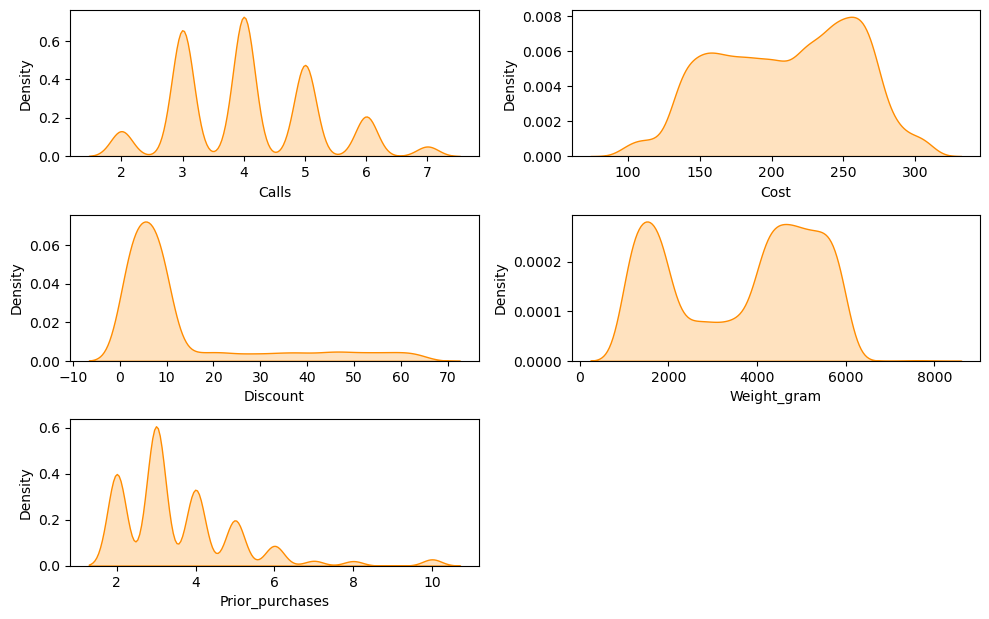

In [27]:
# melihat distribusi data numerical

plt.figure(figsize=(10,12))
for i in range(0, len(['Calls','Cost','Discount','Weight_gram','Prior_purchases'])):
    plt.subplot(6,2, i+1)
    sns.kdeplot(data=df, x=df[['Calls','Cost','Discount','Weight_gram','Prior_purchases'][i]], color='darkorange', fill='True')
    plt.tight_layout()

In [28]:
# cek nilai skewness feature discount dan prior_purchase sebelum transformasi

print('skewness fitur discount: ', round(df['Discount'].skew(axis=0, skipna=True),3))
print('skewness fitur prior_purchase: ', round(df['Prior_purchases'].skew(axis=0, skipna=True),3))

skewness fitur discount:  1.799
skewness fitur prior_purchase:  1.682


Sebelum melakukan penghapusan outliers, log transformation dilakukan pada fitur discount dan prior_purchase yang memiliki distribusi postively skewed

In [29]:
# melakukan transformasi

df['log_discount'] = np.log(df['Discount'])
df['log_prior_purchases'] = np.log(df['Prior_purchases'])

In [30]:
# cek nilai skewness log discount dan prior purchase

print('skewness fitur log_discount:', round(df['log_discount'].skew(axis=0, skipna=True),3))
print('skewness fitur log_prior_purchase:', round(df['log_prior_purchases'].skew(axis=0, skipna=True),3))

skewness fitur log_discount: 0.218
skewness fitur log_prior_purchase: 0.463


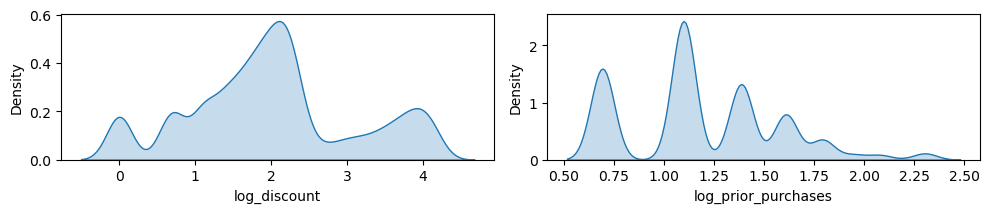

In [31]:
plt.figure(figsize=(10,12))
for i in range(0, len(['log_discount','log_prior_purchases'])):
    plt.subplot(6,2, i+1)
    sns.kdeplot(data=df, x=df[['log_discount','log_prior_purchases'][i]], fill='True')
    plt.tight_layout()

In [32]:
# penghapusan fitur discount, dan prior_purchases 

df.drop(columns=['Discount', 'Prior_purchases' ], inplace=True)

### Pengecekan Z-Score

Melakukan pengecekan Z-Score pada setiap fitur numerik dilakukan untuk acuan penghapusan outliers

In [33]:
from scipy import stats

In [34]:
# Remove outlier Z-Score pada feature log_discount

print(f'Jumlah baris sebelum filtering outlier: {len(df)}')

zscore = abs(stats.zscore(df['log_discount'])) # absolute z-scorenya
filtered_entries = (zscore < 3) # keep kurang dari 3 absolute z-scorenya
df = df[filtered_entries] # filter, ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah filtering outlier: {len(df)}')
print('Tidak terdapat data dengan nilai Z-Score > 3, sehingga tidak ada penghapusan data outliers')

Jumlah baris sebelum filtering outlier: 10999
Jumlah baris setelah filtering outlier: 10999
Tidak terdapat data dengan nilai Z-Score > 3, sehingga tidak ada penghapusan data outliers


In [35]:
# Remove outlier Z-Score pada feature log_prior_purchases

print(f'Jumlah baris sebelum filtering outlier: {len(df)}')

zscore = abs(stats.zscore(df['log_prior_purchases'])) # absolute z-scorenya
filtered_entries = (zscore < 3) # keep kurang dari 3 absolute z-scorenya
df = df[filtered_entries] # filter, ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah filtering outlier: {len(df)}')
print('Tidak terdapat data dengan nilai Z-Score > 3, sehingga tidak ada penghapusan data outliers')

Jumlah baris sebelum filtering outlier: 10999
Jumlah baris setelah filtering outlier: 10999
Tidak terdapat data dengan nilai Z-Score > 3, sehingga tidak ada penghapusan data outliers


In [36]:
# Remove outlier Z-Score pada feature Calls

print(f'Jumlah baris sebelum filtering outlier: {len(df)}')

zscore = abs(stats.zscore(df['Calls'])) # absolute z-scorenya
filtered_entries = (zscore < 3) # keep kurang dari 3 absolute z-scorenya
df = df[filtered_entries] # filter, ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah filtering outlier: {len(df)}')
print('Tidak terdapat data dengan nilai Z-Score > 3, sehingga tidak ada penghapusan data outliers')

Jumlah baris sebelum filtering outlier: 10999
Jumlah baris setelah filtering outlier: 10999
Tidak terdapat data dengan nilai Z-Score > 3, sehingga tidak ada penghapusan data outliers


In [37]:
# Remove outlier Z-Score pada feature Cost

print(f'Jumlah baris sebelum filtering outlier: {len(df)}')

zscore = abs(stats.zscore(df['Cost'])) # absolute z-scorenya
filtered_entries = (zscore < 3) # keep kurang dari 3 absolute z-scorenya
df = df[filtered_entries] # filter, ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah filtering outlier: {len(df)}')
print('Tidak terdapat data dengan nilai Z-Score > 3, sehingga tidak ada penghapusan data outliers')

Jumlah baris sebelum filtering outlier: 10999
Jumlah baris setelah filtering outlier: 10999
Tidak terdapat data dengan nilai Z-Score > 3, sehingga tidak ada penghapusan data outliers


In [38]:
# Remove outlier Z-Score pada feature Weight_gram

print(f'Jumlah baris sebelum filtering outlier: {len(df)}')

zscore = abs(stats.zscore(df['Weight_gram'])) # absolute z-scorenya
filtered_entries = (zscore < 3) # keep kurang dari 3 absolute z-scorenya
df = df[filtered_entries] # filter, ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah filtering outlier: {len(df)}')
print('Tidak terdapat data dengan nilai Z-Score > 3, sehingga tidak ada penghapusan data outliers')

Jumlah baris sebelum filtering outlier: 10999
Jumlah baris setelah filtering outlier: 10999
Tidak terdapat data dengan nilai Z-Score > 3, sehingga tidak ada penghapusan data outliers


## D. Feature Encoding

### One Hot Encoding

one hot encoding dilakukan pada feature Warehouse dan Shipment (feature kategorikal yang tidak bersifat ordinal)

In [39]:
# one hot encoding pada feature Warehouse dan Shipment 

for cat in ['Warehouse', 'Shipment']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

Melakukan penghapusan fitur Warehouse dan Shipment karena sudah dilakukan one hot encoding

In [40]:
# penghapusan fitur Warehouse, dan Shipment 

df.drop(columns=['Warehouse', 'Shipment' ], inplace=True)

### Label Encoding

label encoding dilakukan pada feature Gender dan Product Importance (feature kategorikal yang ordinal)

In [41]:
# label encoding pada feature gender dan Product Importance

# mapping feature gender
mapping_Gender = {
    'F' : 0,
    'M' : 1
}

# mapping feature product importance
mapping_Importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2,
}

# replace kolom gender yang telah dikuantifikasi di dataset
df['Gender'] = df['Gender'].map(mapping_Gender)
df['Importance'] = df['Importance'].map(mapping_Importance)

df

,ID,Calls,Rating,Cost,Importance,Gender,Weight_gram,Late,log_discount,log_prior_purchases,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship
0,1,4,2,177,0,0,1233,1,3.784190,1.098612,0,0,0,1,0,1,0,0
1,2,4,5,216,0,1,3088,1,4.077537,0.693147,0,0,0,0,1,1,0,0
2,3,2,2,183,0,1,3374,1,3.871201,1.386294,1,0,0,0,0,1,0,0
3,4,3,3,176,1,1,1177,1,2.302585,1.386294,0,1,0,0,0,1,0,0
4,5,2,2,184,1,0,2484,1,3.828641,1.098612,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,4,1,252,1,0,1538,1,0.000000,1.609438,1,0,0,0,0,0,0,1
10995,10996,4,1,232,1,0,1247,0,1.791759,1.609438,0,1,0,0,0,0,0,1
10996,10997,5,4,242,0,0,1155,0,1.386294,1.609438,0,0,1,0,0,0,0,1
10997,10998,5,2,223,1,1,1210,0,0.693147,1.791759,0,0,0,0,1,0,0,1


## E. Handle Class Imbalance

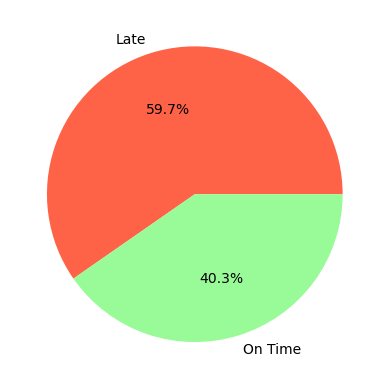

In [42]:
#plotting piechart

#creating the data for pie chart
total_late=df['Late'].sum()
total_on_time= df['Late'].value_counts().sum()-total_late

#draw the pie chart
late_pie=np.array([total_late,total_on_time])
plt.pie(late_pie,labels=['Late','On Time'],colors=['tomato','palegreen'],autopct='%1.1f%%')
plt.show()

In [43]:
#cek ratio jumlah nilai target

df_late = df.groupby('Late').agg({'ID':'count'}).reset_index().rename(columns={'ID':'Jumlah'})
df_late['Ratio'] = round(df_late['Jumlah']*100/df_late['Jumlah'].sum(),3)
df_late

,Late,Jumlah,Ratio
0,0,4436,40.331
1,1,6563,59.669


Handle class imbalance tidak perlu dilakukan karena proporsi kelas minoritas di atas 40% 

# 2. Feature Engineering

## A. Feature Selection

<AxesSubplot:>

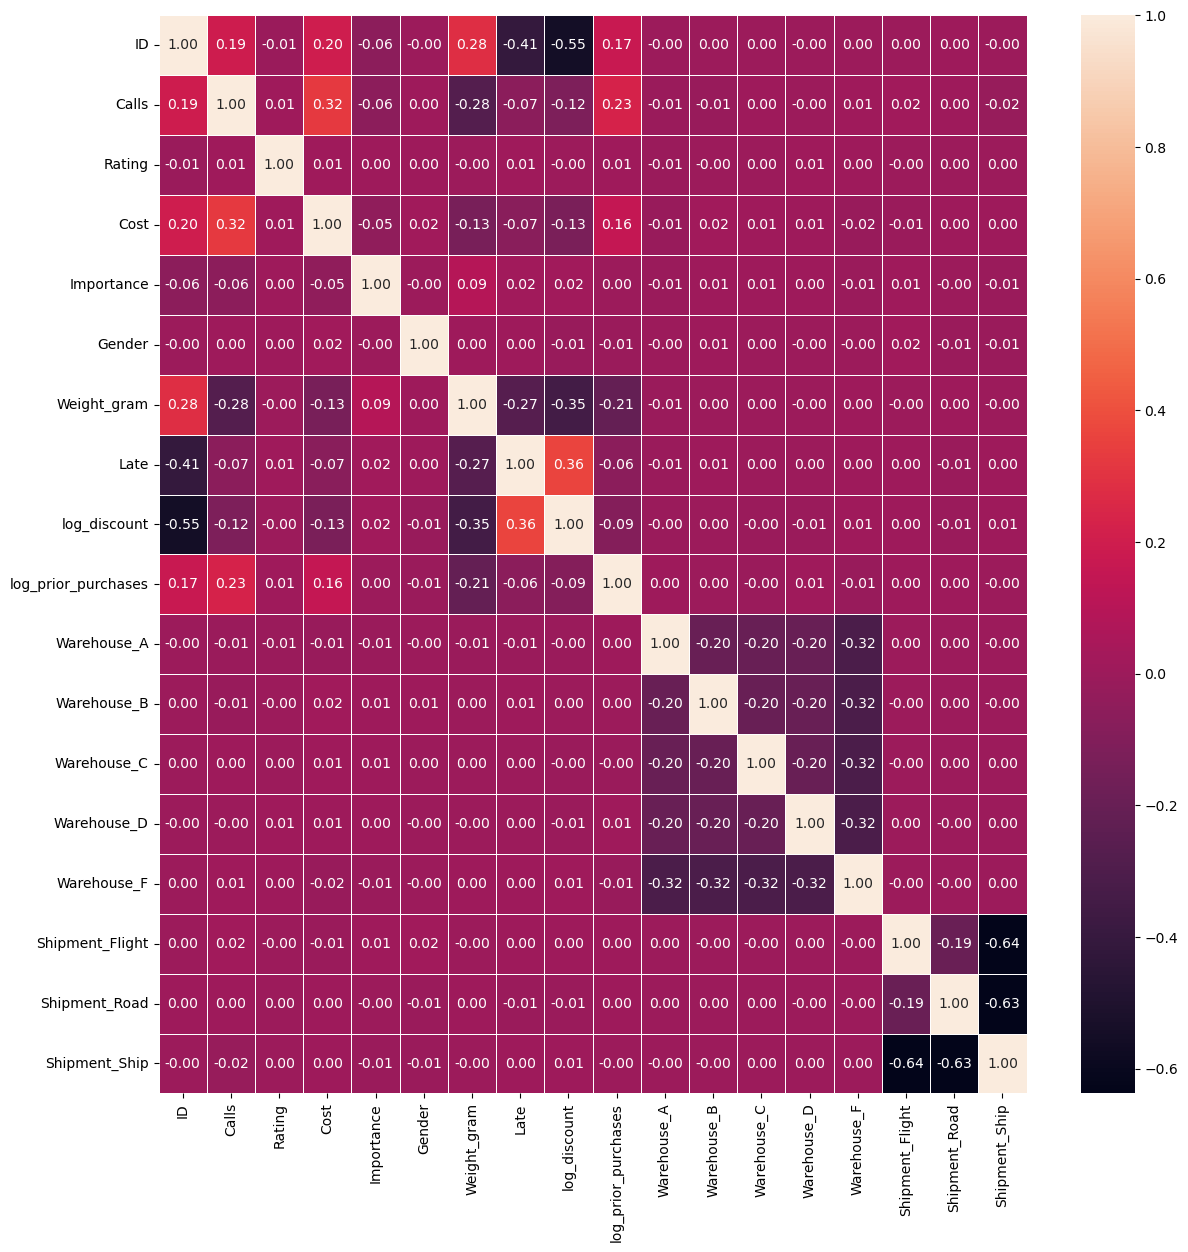

In [183]:
# heat map for Pearson's correlation
heatmap_correlation,ax=plt.subplots(figsize = (14,14))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".2f",ax=ax)

Feature selection berdasarkan Heatmap plot:

1. Fitur ID dihapuskan karena tidak memiliki makna penting pada saat pemodelan
2. Berdasarkan plot heatmap diatas, tidak ada korelasi anatar fitur yang bernilai >0.7, sehingga tidak perlu dilakukan penghapusan fitur redundan
3. Fitur shipment, werehouse, gender, importance, dan rating karena memiliki korelasi dibawa 0.05 terhadap target (dianggap pengaruhnya terlalu kecil terhadap target)

Kami mencoba melakukan eksperimen dengan 2 dataset:
1. Dataset pertama (df1) melibatkan semua fitur dengan korelasi dibawah 0.05 terhadap target
2. Dataset kedua (df2) tidak melibatkan fitur-fitur dengan korelasi di bawah 0.05 terhadap target

In [44]:
# Penghapusan fitur yang tidak digunakan pada pemodelan dataset 1

df1 = df.drop(columns='ID')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10999 entries, 0 to 10998
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Calls                10999 non-null  int64  
 1   Rating               10999 non-null  int64  
 2   Cost                 10999 non-null  int64  
 3   Importance           10999 non-null  int64  
 4   Gender               10999 non-null  int64  
 5   Weight_gram          10999 non-null  int64  
 6   Late                 10999 non-null  int64  
 7   log_discount         10999 non-null  float64
 8   log_prior_purchases  10999 non-null  float64
 9   Warehouse_A          10999 non-null  uint8  
 10  Warehouse_B          10999 non-null  uint8  
 11  Warehouse_C          10999 non-null  uint8  
 12  Warehouse_D          10999 non-null  uint8  
 13  Warehouse_F          10999 non-null  uint8  
 14  Shipment_Flight      10999 non-null  uint8  
 15  Shipment_Road        10999 non-null 

In [19]:
df.columns

Index(['ID', 'Calls', 'Rating', 'Cost', 'Prior_purchases', 'Importance',
       'Gender', 'Discount', 'Weight_gram', 'Late', 'log_discount',
       'log_prior_purchases', 'Warehouse_A', 'Warehouse_B', 'Warehouse_C',
       'Warehouse_D', 'Warehouse_F', 'Shipment_Flight', 'Shipment_Road',
       'Shipment_Ship'],
      dtype='object')

In [45]:
# Penghapusan fitur yang tidak digunakan pada pemodelan dataset 2

df2 = df.drop(columns=['ID',  
                       'Rating',  
                       'Importance', 
                       'Gender',  
                       'Warehouse_A',
                       'Warehouse_B', 
                       'Warehouse_C', 
                       'Warehouse_D', 
                       'Warehouse_F',
                       'Shipment_Flight', 
                       'Shipment_Road', 
                       'Shipment_Ship'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10999 entries, 0 to 10998
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Calls                10999 non-null  int64  
 1   Cost                 10999 non-null  int64  
 2   Weight_gram          10999 non-null  int64  
 3   Late                 10999 non-null  int64  
 4   log_discount         10999 non-null  float64
 5   log_prior_purchases  10999 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 859.5 KB


In [46]:
df2.sample(10)

,Calls,Cost,Weight_gram,Late,log_discount,log_prior_purchases
8485,5,145,5019,0,1.609438,1.098612
8398,3,246,5650,1,0.000000,1.098612
114,3,168,1616,1,3.912023,0.693147
3026,3,212,3547,1,4.025352,0.693147
765,4,259,2495,1,2.564949,1.386294
5093,5,237,5432,0,2.079442,1.386294
3231,2,140,4691,0,0.693147,1.098612
4289,3,259,5939,0,1.791759,2.079442
90,5,174,1085,1,3.713572,1.791759
10510,3,195,4669,1,0.693147,0.693147


In [47]:
df2.shape

(10999, 6)

<b>Feature Importance & Target Variable

In [48]:
# hapus Late (target variable)

Xs1 = df1.drop(columns= 'Late') #fitur dataset 1
ys1 = df1['Late'] #target dataset 1
Xs2 = df2.drop(columns= 'Late') #fitur dataset 1
ys2 = df2['Late'] #target dataset 1

<b>Dataset Split

In [49]:
# split train and test

from sklearn.model_selection import train_test_split

Xs_train1, Xs_test1, ys_train1, ys_test1 = train_test_split(Xs1, ys1, test_size=0.3, random_state=42)

Xs_train2, Xs_test2, ys_train2, ys_test2 = train_test_split(Xs2, ys2, test_size=0.3, random_state=42)


In [440]:
# pembuatan fungsi untuk mengeluarkan output skor evaluasi model dataset 1

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification_df1(model, scaler):
    X_train_scaled1 = scaler.fit_transform(Xs_train1) # fit dan transform data train
    X_test_scaled1 = scaler.transform(Xs_test1) # transform data test menggunakan scaler yang sama
    model.fit(X_train_scaled1, ys_train1) # fit model ke data train yang telah di-scale
    ys_pred1 = model.predict(X_test_scaled1)
    ys_pred_train1 = model.predict(X_train_scaled1)
    ys_pred_proba1 = model.predict_proba(X_test_scaled1)
    ys_pred_proba_train1 = model.predict_proba(X_train_scaled1)
    
    
    print("Accuracy (Train Set): %.2f" % accuracy_score(ys_train1, ys_pred_train1))
    print("Accuracy (Test Set): %.2f" % accuracy_score(ys_test1, ys_pred1))
    print("Precision (Train Set): %.2f" % precision_score(ys_train1, ys_pred_train1))
    print("Precision (Test Set): %.2f" % precision_score(ys_test1, ys_pred1))
    print("Recall (Train Set): %.2f" % recall_score(ys_train1, ys_pred_train1))
    print("Recall (Test Set): %.2f" % recall_score(ys_test1, ys_pred1))
    print("F1-Score (Train Set): %.2f" % f1_score(ys_train1, ys_pred_train1))
    print("F1-Score (Test Set): %.2f" % f1_score(ys_test1, ys_pred1))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(ys_train1, ys_pred_proba_train1[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(ys_test1, ys_pred_proba1[:, 1]))

    X_scaled1 = scaler.fit_transform(Xs1)
    score = cross_validate(model, X_scaled1, ys1, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

In [441]:
# pembuatan fungsi untuk mengeluarkan output skor evaluasi model dataset 2

def eval_classification_df2(model, scaler):
    X_train_scaled2 = scaler.fit_transform(Xs_train2) # fit dan transform data train
    X_test_scaled2 = scaler.transform(Xs_test2) # transform data test menggunakan scaler yang sama
    model.fit(X_train_scaled2, ys_train2) # fit model ke data train yang telah di-scale
    ys_pred2 = model.predict(X_test_scaled2)
    ys_pred_train2 = model.predict(X_train_scaled2)
    ys_pred_proba2 = model.predict_proba(X_test_scaled2)
    ys_pred_proba_train2 = model.predict_proba(X_train_scaled2)
    
    
    print("Accuracy (Train Set): %.2f" % accuracy_score(ys_train2, ys_pred_train2))
    print("Accuracy (Test Set): %.2f" % accuracy_score(ys_test2, ys_pred2))
    print("Precision (Train Set): %.2f" % precision_score(ys_train2, ys_pred_train2))
    print("Precision (Test Set): %.2f" % precision_score(ys_test2, ys_pred2))
    print("Recall (Train Set): %.2f" % recall_score(ys_train2, ys_pred_train2))
    print("Recall (Test Set): %.2f" % recall_score(ys_test2, ys_pred2))
    print("F1-Score (Train Set): %.2f" % f1_score(ys_train2, ys_pred_train2))
    print("F1-Score (Test Set): %.2f" % f1_score(ys_test2, ys_pred2))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(ys_train2, ys_pred_proba_train2[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(ys_test2, ys_pred_proba2[:, 1]))

    X_scaled2 = scaler.fit_transform(Xs2)
    score = cross_validate(model, X_scaled2, ys2, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

In [195]:
# pembuatan fungsi untuk melihat hyperparameter yang telah dituning

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

<b>Modelling

Modelling : Logistic Regression

In [322]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.preprocessing import StandardScaler # import standard scaler dari sklearn

# evaluasi model logistic regression menggunakan dataset 1

logregs = LogisticRegression() # inisiasi model dengan nama logreg
lr_scaller = StandardScaler()  # inisiasi scaler dengan nama lr_scaller
eval_classification_df1(logregs, lr_scaller)

Accuracy (Train Set): 0.63
Accuracy (Test Set): 0.63
Precision (Train Set): 0.67
Precision (Test Set): 0.67
Recall (Train Set): 0.73
Recall (Test Set): 0.74
F1-Score (Train Set): 0.70
F1-Score (Test Set): 0.70
roc_auc (train-proba): 0.72
roc_auc (test-proba): 0.72
roc_auc (crossval train): 0.7221490292143313
roc_auc (crossval test): 0.7048837962787399


In [323]:
# evaluasi model logistic regression menggunakan dataset 2

eval_classification_df2(logregs, lr_scaller)

Accuracy (Train Set): 0.63
Accuracy (Test Set): 0.63
Precision (Train Set): 0.68
Precision (Test Set): 0.67
Recall (Train Set): 0.74
Recall (Test Set): 0.74
F1-Score (Train Set): 0.71
F1-Score (Test Set): 0.70
roc_auc (train-proba): 0.72
roc_auc (test-proba): 0.71
roc_auc (crossval train): 0.7204358735253261
roc_auc (crossval test): 0.7047510258195843


nilai ROC-AUC menunjukan model dengan dataset 1 menghasilkan performa sedikit lebih baik dengan selisih nilai ROC-AUC metode crossvalidation pada data train dan data tes hanya sebesar 0.02, langkah selanjutnya adalah mencoba tuning hyperparameter.

<b>Modelling: Hyperparameter tuning 

Hyperparameter yang biasa di tuning pada Logistic Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html </br>

C: nilai regularization </br>
penalty: menggukanan l2 norm (ridge), l1 (lasso), atau elastic net </br>
solver: metode bagaimana kita melakukan update pada variable di logistic regression (slope/intercept): liblinear bagus jika data sedikit; sag & saga bagus jika data besar (karena menggunakan metode sampling)</br>

param value: 0.0001; train: 0.7210085850422956; test: 0.7149175541051185
param value: 0.004179591836734694; train: 0.7219413250491522; test: 0.7151349407420131
param value: 0.008259183673469388; train: 0.722004855761494; test: 0.7151345573440644
param value: 0.012338775510204082; train: 0.7220236071171191; test: 0.7151134704568877
param value: 0.016418367346938776; train: 0.7220476060536093; test: 0.7151015851204789
param value: 0.020497959183673472; train: 0.7220523638602604; test: 0.7150870159984296
param value: 0.024577551020408164; train: 0.7220543229571168; test: 0.7150785812435589
param value: 0.028657142857142857; train: 0.7220560721507385; test: 0.7150701464886882
param value: 0.032736734693877556; train: 0.7220605500864102; test: 0.7150597947440742
param value: 0.03681632653061225; train: 0.7220671970221728; test: 0.7150643955194582
param value: 0.04089591836734695; train: 0.7220685963770701; test: 0.7150632453256123
param value: 0.04497551020408164; train: 0.7220697858287329;

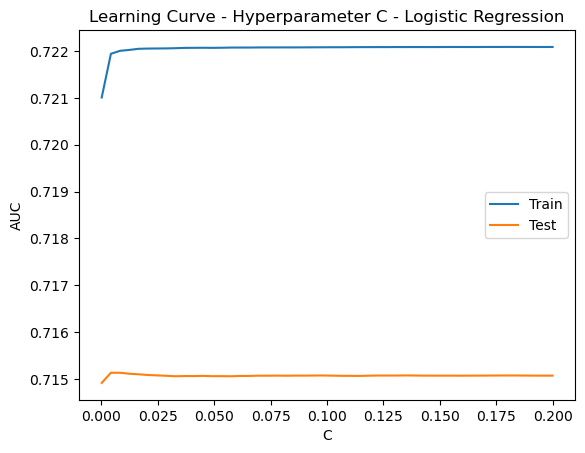

In [324]:
# Gambar learning curve model logistic regression dataset 1

import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve_df1(param_values, scaler):
    train_scores = []
    test_scores = []
    
    X_train_scaled1 = scaler.fit_transform(Xs_train1) # fit dan transform data train
    X_test_scaled1 = scaler.transform(Xs_test1) # transform data test menggunakan scaler yang sama

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c) #ini bisa diutak-atik
        model.fit(X_train_scaled1, ys_train1)

        # eval on train
        ys_pred_train_proba = model.predict_proba(X_train_scaled1)
        train_auc = roc_auc_score(ys_train1, ys_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        ys_pred_proba = model.predict_proba(X_test_scaled1)
        test_auc = roc_auc_score(ys_test1, ys_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()
    
lr_scaler = StandardScaler()
param_values = [float(x) for x in np.linspace(0.0001, 0.2, 50)] #ini bisa diutak atik
draw_learning_curve_df1(param_values, lr_scaler)

Terlihat ROC-AUC data train selalu di atas data test dengan kondisi nilai AUC  data test terdekat pada data train berada pada nilai C mendekeati 0 (<0.01) 

In [428]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2'] # pakai lasso dan ridge
C = [float(x) for x in np.linspace(0.0001, 0.01, 100)] # buat 100 iterasi antara 0.0001 sampai 0.05
hyperparameters = dict(penalty=penalty, C=C)

logregs = LogisticRegression()
rss = RandomizedSearchCV(logregs, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
lr_scaller = StandardScaler()

# eval model menggunakan dataset 1
eval_classification_df1(rss, lr_scaller)

Accuracy (Train Set): 0.63
Accuracy (Test Set): 0.62
Precision (Train Set): 0.67
Precision (Test Set): 0.67
Recall (Train Set): 0.75
Recall (Test Set): 0.75
F1-Score (Train Set): 0.71
F1-Score (Test Set): 0.71
roc_auc (train-proba): 0.72
roc_auc (test-proba): 0.72
roc_auc (crossval train): 0.7221626858321765
roc_auc (crossval test): 0.7045415765809202


In [426]:
# eval model menggunakan dataset 2

eval_classification_df2(rss, lr_scaller)

Accuracy (Train Set): 0.63
Accuracy (Test Set): 0.63
Precision (Train Set): 0.67
Precision (Test Set): 0.67
Recall (Train Set): 0.75
Recall (Test Set): 0.75
F1-Score (Train Set): 0.71
F1-Score (Test Set): 0.71
roc_auc (train-proba): 0.72
roc_auc (test-proba): 0.72
roc_auc (crossval train): 0.7205298315671909
roc_auc (crossval test): 0.704068114038208


In [389]:
show_best_hyperparameter(rss)

{'C': 0.0048000000000000004, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Dari hasil tuning parameter, tidak terlihat perubahan yang signifikan. Dengan demikian model best-fit yang didapat untuk model logistic regression terdapat pada model dataset 1. Nilai ROC-AUC yang didapat adalah 0.72 baik untuk data train maupun data test. Sementara untuk metode crossvaliadation, milai ROC-AUC data train adalah 0.72 dan 0.70 untuk data test.

In [429]:
# menampilkan fitur importance dataset 2

rss.best_estimator_.coef_

array([[-0.16929364,  0.0419037 , -0.12158517,  0.06087261,  0.00928234,
        -0.48509583,  0.61753072, -0.17248727, -0.02026644,  0.01305984,
         0.02541305, -0.00903135, -0.00708207,  0.00786409, -0.00964359,
         0.00133483]])

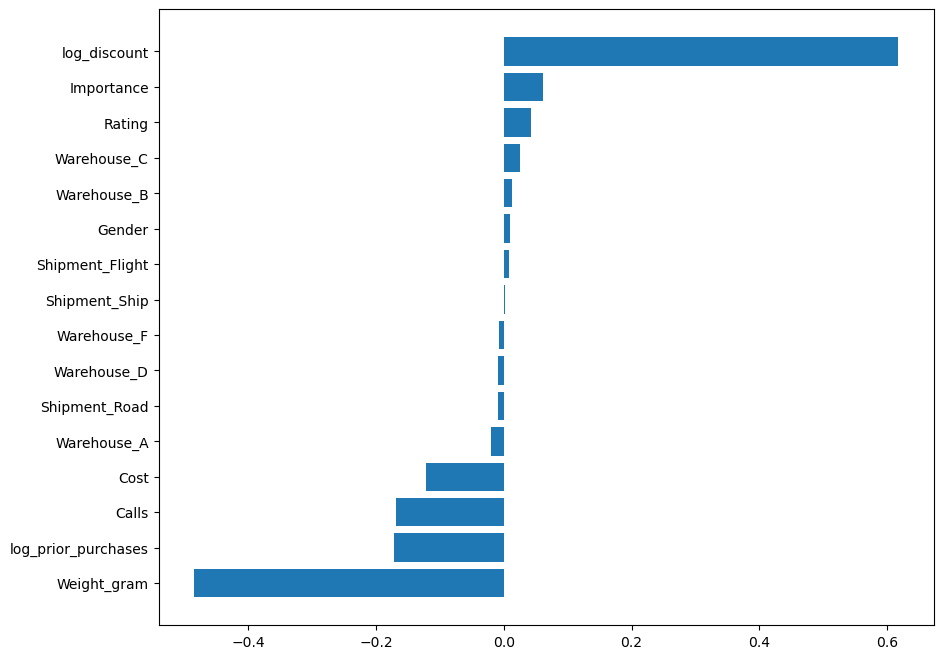

In [433]:
ft_logregs =  np.array([-0.16929364,  0.0419037 , -0.12158517,  0.06087261,  0.00928234,
        -0.48509583,  0.61753072, -0.17248727, -0.02026644,  0.01305984,
         0.02541305, -0.00903135, -0.00708207,  0.00786409, -0.00964359,
         0.00133483])

dft1 = pd.DataFrame({'Feature Names' : Xs1.columns, 'Importances' : ft_logregs}).sort_values(by = 'Importances')

fig = plt.figure(figsize = (10, 8))
plt.barh(dft1['Feature Names'], dft1['Importances'])
plt.show()

Untuk dataset 1, feature importance tertinggi adalah discount, diikuti dengan weight_gram.

In [264]:
Xs2.columns

Index(['Calls', 'Cost', 'Weight_gram', 'log_discount', 'log_prior_purchases'], dtype='object')

In [427]:
# menampilkan fitur importance dataset 2

rss.best_estimator_.coef_

array([[-0.16640804, -0.11922492, -0.46625065,  0.6053586 , -0.16383184]])

Berdasarkan nilai koefisien di atas, dapat terlihat bahwa urutan fitur importance pada model logistic regression adalah sebagai berikut:
1. log_discount dengan koefisien 0.6
2. Weight_gram dengan koefisien -0.47
3. Calls dengan koefisien -0.17
4. log_prior_purchases dengan koefisien -0.16
5. Cost dengan koefisien -0.12

<b>Decission Tree

In [330]:
# Model decision Tree menggunakan dataset 1

from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dts
dt_scaler = StandardScaler()
eval_classification_df1(dt, dt_scaler)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.65
Precision (Train Set): 1.00
Precision (Test Set): 0.71
Recall (Train Set): 1.00
Recall (Test Set): 0.72
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.71
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.64
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.6166882401230197


In [331]:
# Model decision Tree menggunakan dataset 2

eval_classification_df2(dt, dt_scaler)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.66
Precision (Train Set): 1.00
Precision (Test Set): 0.71
Recall (Train Set): 1.00
Recall (Test Set): 0.73
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.72
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.64
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.6164813311693894


Berdasarkan hasil evaluasi model di atas, didapati model masih overvitting dimana perbadaan nilai roc_auc antara data train dan data test di atas 10% (> 0.1) dengan dataset kedua memberikan hasil sedikit lebih baik dibanidng dataset pertama. Selanjutnya akan dilakukan tuning parameter untuk menemukan best fit.

In [442]:
# Tuning Parameter decision tree untuk dataset 1

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt  = DecisionTreeClassifier()
dtr = RandomizedSearchCV(dt, hyperparameters, scoring='roc_auc', random_state=42, cv=5)

eval_classification_df1(dtr, dt_scaler)

Accuracy (Train Set): 0.72
Accuracy (Test Set): 0.67
Precision (Train Set): 0.80
Precision (Test Set): 0.76
Recall (Train Set): 0.70
Recall (Test Set): 0.66
F1-Score (Train Set): 0.75
F1-Score (Test Set): 0.70
roc_auc (train-proba): 0.81
roc_auc (test-proba): 0.75
roc_auc (crossval train): 0.8004201355945085
roc_auc (crossval test): 0.7173377857539864


In [443]:
eval_classification_df2(dtr, dt_scaler)

Accuracy (Train Set): 0.73
Accuracy (Test Set): 0.66
Precision (Train Set): 0.81
Precision (Test Set): 0.75
Recall (Train Set): 0.71
Recall (Test Set): 0.65
F1-Score (Train Set): 0.75
F1-Score (Test Set): 0.69
roc_auc (train-proba): 0.82
roc_auc (test-proba): 0.74
roc_auc (crossval train): 0.8105845526520457
roc_auc (crossval test): 0.7261579297050267


Berdasarkan evaluasi model diatas, model terbaik didapat dari dataset 2. Nilai roc_auc sudah dapat diterima (cukup best-fit) dengan roc_auc data train 0.82 dan roc_auc data test 0.74. Sementera nilai roc_auc yang didapat dengan metode crossvalidation adalah 0.81 untuk data train, dan 0.73 untuk data test.

<b>Feature Importance

In [268]:
Xs2.columns

Index(['Calls', 'Cost', 'Weight_gram', 'log_discount', 'log_prior_purchases'], dtype='object')

In [369]:
# pembuatan fungsi untuk melihat feature importance pada model dataset 1

def show_feature_importance_df1(model, scaler):
    X_train_scaled1 = scaler.fit_transform(Xs_train1) # fit dan transform data train
    X_test_scaled1 = scaler.transform(Xs_test1) # transform data test menggunakan scaler yang sama
    model.fit(X_train_scaled1, ys_train1) # fit model ke data train yang telah di-scale
    feat_importances = pd.Series(model.feature_importances_, index=Xs1.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score') 

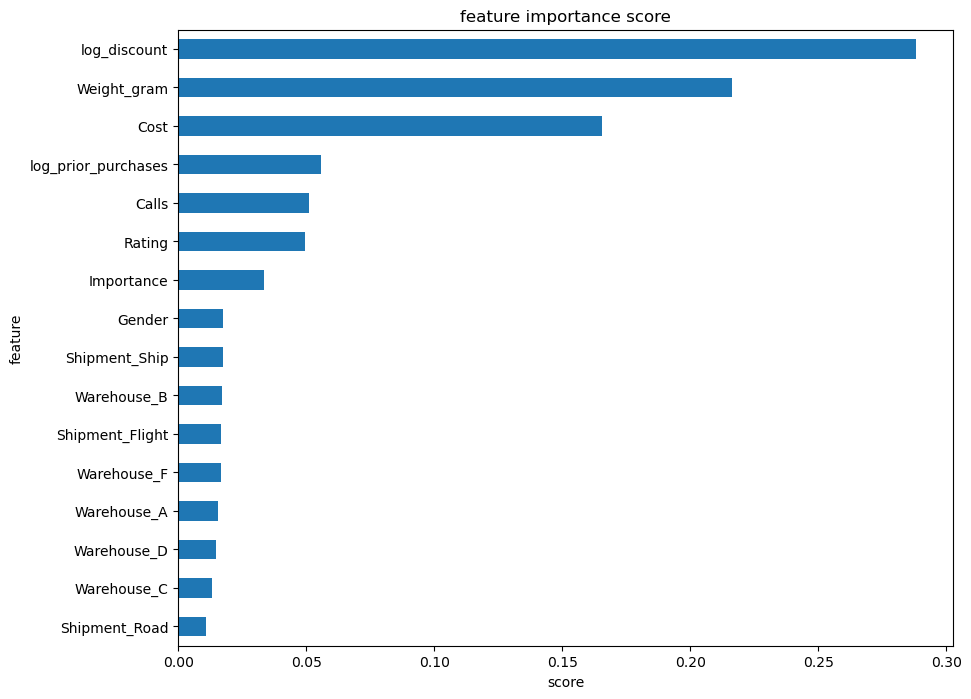

In [379]:
show_feature_importance_df1(dt, dt_scaler)

In [371]:
# pembuatan fungsi untuk melihat feature importance pada model dataset 2

def show_feature_importance_df2(model, scaler):
    X_train_scaled2 = scaler.fit_transform(Xs_train2) # fit dan transform data train
    X_test_scaled2 = scaler.transform(Xs_test2) # transform data test menggunakan scaler yang sama
    model.fit(X_train_scaled2, ys_train2) # fit model ke data train yang telah di-scale
    feat_importances = pd.Series(model.feature_importances_, index=Xs2.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 4))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score') 

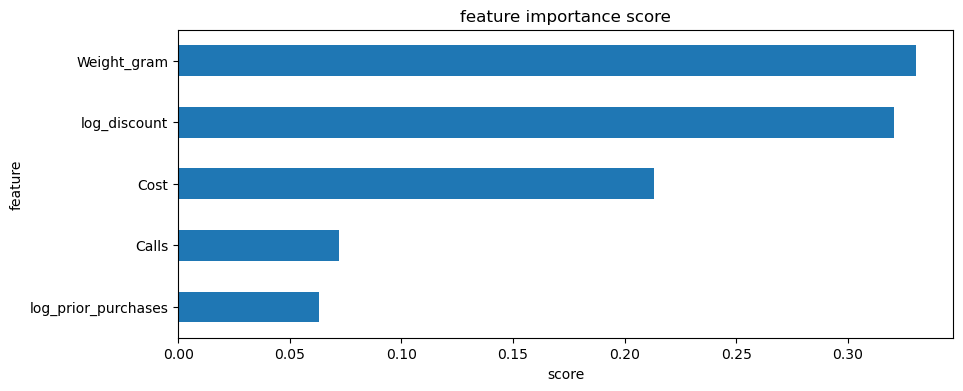

In [376]:
show_feature_importance_df2(dt, dt_scaler)

<b>Modelling : K-Nearest Neighbor

In [335]:
# K-Nearest Neighbor

#evaluasi K-Nearest Neighbor Menggunakanan dataset 1
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
from sklearn.preprocessing import MinMaxScaler # import standard scaler dari sklearn

knns = KNeighborsClassifier() # inisiasi object dengan nama knns
minmax_scaler=MinMaxScaler() # inisiasi object dengan nama minmax_scaler

eval_classification_df1(knns,minmax_scaler) #fit into model dataset 1

Accuracy (Train Set): 0.77
Accuracy (Test Set): 0.63
Precision (Train Set): 0.82
Precision (Test Set): 0.70
Recall (Train Set): 0.78
Recall (Test Set): 0.66
F1-Score (Train Set): 0.80
F1-Score (Test Set): 0.68
roc_auc (train-proba): 0.85
roc_auc (test-proba): 0.69
roc_auc (crossval train): 0.8529567439591373
roc_auc (crossval test): 0.6722557597216354


In [337]:
eval_classification_df2(knns,minmax_scaler) #fit into model dataset 2

Accuracy (Train Set): 0.77
Accuracy (Test Set): 0.66
Precision (Train Set): 0.83
Precision (Test Set): 0.74
Recall (Train Set): 0.77
Recall (Test Set): 0.67
F1-Score (Train Set): 0.80
F1-Score (Test Set): 0.71
roc_auc (train-proba): 0.86
roc_auc (test-proba): 0.73
roc_auc (crossval train): 0.8609486838250939
roc_auc (crossval test): 0.7068810937856541


Perbedaan nilai roc_auc pada data train dan data tes masih diatas 0.1(>10%) atau model masih overfitting, selanjutnya dilakukan tuning hyperparmater

<b>Modelling : Attempting to tune Hyperparameters kNN

In [341]:
# attempting to tune hyper parameter

from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,31))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knns = KNeighborsClassifier() # inisiasi object dengan nama knns
minmax_scaler=MinMaxScaler() # inisiasi object dengan nama minmax_scaler

rss_knn = RandomizedSearchCV(knns, hyperparameters, scoring='roc_auc', random_state=42, cv=5) # inisiasi oject untuk randomized search

# eval model menggunakan dataset 1
eval_classification_df1(rss_knn, minmax_scaler)

Accuracy (Train Set): 0.69
Accuracy (Test Set): 0.63
Precision (Train Set): 0.75
Precision (Test Set): 0.71
Recall (Train Set): 0.71
Recall (Test Set): 0.66
F1-Score (Train Set): 0.73
F1-Score (Test Set): 0.68
roc_auc (train-proba): 0.78
roc_auc (test-proba): 0.71
roc_auc (crossval train): 0.7760188165509445
roc_auc (crossval test): 0.6895884900449881


In [342]:
# eval model menggunakan dataset 2
eval_classification_df2(rss_knn, minmax_scaler)

Accuracy (Train Set): 0.71
Accuracy (Test Set): 0.66
Precision (Train Set): 0.82
Precision (Test Set): 0.78
Recall (Train Set): 0.64
Recall (Test Set): 0.61
F1-Score (Train Set): 0.72
F1-Score (Test Set): 0.68
roc_auc (train-proba): 0.79
roc_auc (test-proba): 0.73
roc_auc (crossval train): 0.800466609923529
roc_auc (crossval test): 0.7213124607969703


<b> Modelling: Attempting to draw learning curve

param value: 1; train: 1.0; test: 0.609789069784561
param value: 3; train: 0.8896706618248987; test: 0.6807387771752466
param value: 5; train: 0.8496370773073613; test: 0.6945669826888157
param value: 7; train: 0.8297341575533679; test: 0.7018854744319576
param value: 9; train: 0.8183302197686867; test: 0.6999951308460519
param value: 11; train: 0.8078765838948245; test: 0.6990249423369486
param value: 13; train: 0.7993264205201401; test: 0.702169955709869
param value: 15; train: 0.7976645116601246; test: 0.7007391145654414
param value: 17; train: 0.7922400873197456; test: 0.7054123521617509
param value: 19; train: 0.78896433744044; test: 0.7071802001030573
param value: 21; train: 0.7848854628016484; test: 0.7059335816729646
param value: 23; train: 0.7817981710431492; test: 0.7065134710703245
param value: 25; train: 0.7799269536743562; test: 0.7103566521077685
param value: 27; train: 0.7761492202094834; test: 0.7136642262109241
param value: 29; train: 0.7748628632200555; test: 0.714320

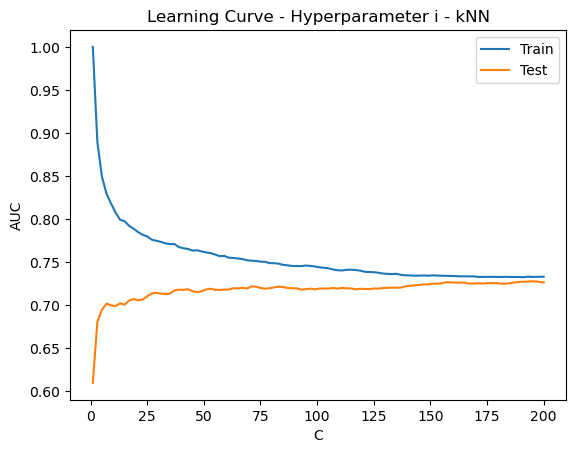

In [343]:
# Gambar learning curve model dataset 1

import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def draw_learning_curve_df1_knn(param_values, scaler):
    train_scores = []
    test_scores = []
    
    X_train_scaled1 = scaler.fit_transform(Xs_train1) # fit dan transform data train
    X_test_scaled1 = scaler.transform(Xs_test1) # transform data test menggunakan scaler yang sama

    for i in param_values:
        model=KNeighborsClassifier(n_neighbors=i) #model knn
        model.fit(X_train_scaled1, ys_train1) #fit into model

        # eval on train
        ys_pred_train_proba = model.predict_proba(X_train_scaled1)
        train_auc = roc_auc_score(ys_train1, ys_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        ys_pred_proba = model.predict_proba(X_test_scaled1)
        test_auc = roc_auc_score(ys_test1, ys_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter i - kNN')
    plt.legend()
    plt.show()
    
minmax_scaler=MinMaxScaler() # inisiasi object dengan nama minmax_scaler
param_values = [int(x) for x in np.linspace(1, 200, 100)] #ini bisa diutak atik
draw_learning_curve_df1_knn(param_values, lr_scaler)

param value: 1; train: 1.0; test: 0.6275472959709477
param value: 3; train: 0.8980804699033746; test: 0.7111150132502331
param value: 5; train: 0.8585008710984235; test: 0.7324373067674338
param value: 7; train: 0.8386527360886632; test: 0.732914637213525
param value: 9; train: 0.8255439992163613; test: 0.7316369635495902
param value: 11; train: 0.8187686376580396; test: 0.7330965595401678
param value: 13; train: 0.8108741070366561; test: 0.7333076201109092
param value: 15; train: 0.80678295305864; test: 0.7332947762796289
param value: 17; train: 0.8040238100235791; test: 0.7313846876993668
param value: 19; train: 0.8004234098080785; test: 0.731941189821858
param value: 21; train: 0.7987729056904767; test: 0.734108538425676
param value: 23; train: 0.796108953772311; test: 0.7310890878809442
param value: 25; train: 0.7934182042078601; test: 0.7309650586445502
param value: 27; train: 0.790757750676938; test: 0.7327961672473867
param value: 29; train: 0.7883787423997537; test: 0.731411333

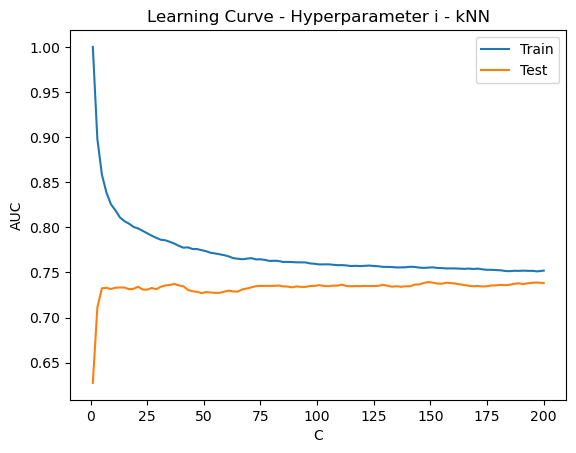

In [304]:
# Gambar learning curve model dataset 2

import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def draw_learning_curve_df2_knn(param_values, scaler):
    train_scores = []
    test_scores = []
    
    X_train_scaled2 = scaler.fit_transform(Xs_train2) # fit dan transform data train
    X_test_scaled2 = scaler.transform(Xs_test2) # transform data test menggunakan scaler yang sama

    for i in param_values:
        model=KNeighborsClassifier(n_neighbors=i) #model knn
        model.fit(X_train_scaled2, ys_train2) #fit into model

        # eval on train
        ys_pred_train_proba = model.predict_proba(X_train_scaled2)
        train_auc = roc_auc_score(ys_train2, ys_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        ys_pred_proba = model.predict_proba(X_test_scaled2)
        test_auc = roc_auc_score(ys_test2, ys_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter i - kNN')
    plt.legend()
    plt.show()
    
minmax_scaler=MinMaxScaler() # inisiasi object dengan nama minmax_scaler
param_values = [int(x) for x in np.linspace(1, 200, 100)] #ini bisa diutak atik
draw_learning_curve_df2_knn(param_values, lr_scaler)

dari hasil learning curve untuk dataset 1 dan 2, dapat dilihat bahwa model kNN untuk dataset 1 dan dataset 2 sudah best fit karena gap / jarak antara ROC-AUC untuk test dan train sudah <10% / 0.1 dengan hasil terbaik diperoleh pada dataset 2

<b> Feature Importance kNN </b> <br>
kNN tidak memiliki fitur untuk menunjukan feature importance karena semua feature diasumsikan sama bobotnya.

<b>Modelling : Naive Bayes

In [344]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB() # Inisiasi model Naive Bayes
nb_scaler = MinMaxScaler() # pada dasarnya model naive bayes tidak memerlukan scaler karena semua fitur dianggap indepnden

eval_classification_df1(nb,nb_scaler) #fit into model dataset 1

Accuracy (Train Set): 0.65
Accuracy (Test Set): 0.64
Precision (Train Set): 0.74
Precision (Test Set): 0.74
Recall (Train Set): 0.63
Recall (Test Set): 0.63
F1-Score (Train Set): 0.68
F1-Score (Test Set): 0.68
roc_auc (train-proba): 0.73
roc_auc (test-proba): 0.72
roc_auc (crossval train): 0.7305703533186023
roc_auc (crossval test): 0.7023894576496604


In [345]:
eval_classification_df2(nb,nb_scaler) #fit into model dataset 2

Accuracy (Train Set): 0.64
Accuracy (Test Set): 0.64
Precision (Train Set): 0.74
Precision (Test Set): 0.74
Recall (Train Set): 0.63
Recall (Test Set): 0.63
F1-Score (Train Set): 0.68
F1-Score (Test Set): 0.68
roc_auc (train-proba): 0.73
roc_auc (test-proba): 0.72
roc_auc (crossval train): 0.7278890993694442
roc_auc (crossval test): 0.7027970760439815


Berdasarkan evaluasi model diatas, dataset pertama menghasilkan result sedikit lebih baik, selanjutnya akan coba ditampilkan learning curve untuk melakukan tuning hyper pamareter

param value: 0; train: 0.730308557754875; test: 0.7177968726996123
param value: 0; train: 0.730308557754875; test: 0.7177968726996123
param value: 0; train: 0.730308557754875; test: 0.7177968726996123
param value: 0; train: 0.730308557754875; test: 0.7177968726996123
param value: 0; train: 0.730308557754875; test: 0.7177968726996123
param value: 0; train: 0.730308557754875; test: 0.7177968726996123
param value: 0; train: 0.730308557754875; test: 0.7177968726996123
param value: 0; train: 0.730308557754875; test: 0.7177968726996123
param value: 0; train: 0.730308557754875; test: 0.7177968726996123
param value: 0; train: 0.730308557754875; test: 0.7177968726996123
param value: 0; train: 0.730308557754875; test: 0.7177968726996123
param value: 0; train: 0.730308557754875; test: 0.7177968726996123
param value: 0; train: 0.730308557754875; test: 0.7177968726996123
param value: 0; train: 0.730308557754875; test: 0.7177968726996123
param value: 0; train: 0.730308557754875; test: 0.717796872699

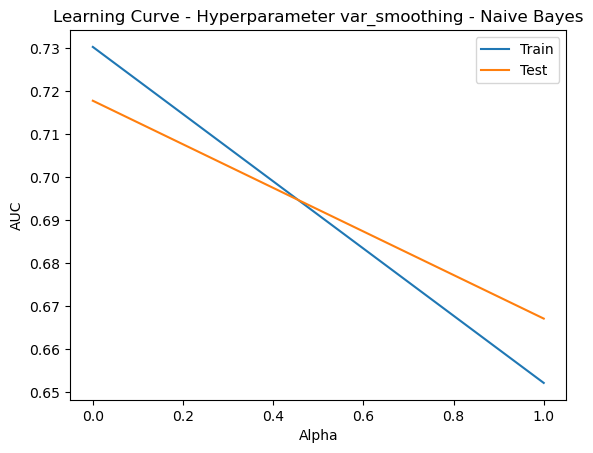

In [346]:
# Gambar learning curve dataset 1

def draw_learning_curve_nb1(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = GaussianNB(var_smoothing=c) #ini bisa diutak-atik
        model.fit(Xs_train1, ys_train1)

        # eval on train
        ys_pred_train_proba = model.predict_proba(Xs_train1)
        train_auc = roc_auc_score(ys_train1, ys_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        ys_pred_proba = model.predict_proba(Xs_test1)
        test_auc = roc_auc_score(ys_test1, ys_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('Alpha')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter var_smoothing - Naive Bayes')
    plt.legend()
    plt.show()
    

param_values = [int(x) for x in np.linspace(0, 1, 25)] #ini bisa diutak atik
draw_learning_curve_nb1(param_values)

param value: 0; train: 0.7279062152347767; test: 0.7185828384943809
param value: 0; train: 0.7279062152347767; test: 0.7185828384943809
param value: 0; train: 0.7279062152347767; test: 0.7185828384943809
param value: 0; train: 0.7279062152347767; test: 0.7185828384943809
param value: 0; train: 0.7279062152347767; test: 0.7185828384943809
param value: 0; train: 0.7279062152347767; test: 0.7185828384943809
param value: 0; train: 0.7279062152347767; test: 0.7185828384943809
param value: 0; train: 0.7279062152347767; test: 0.7185828384943809
param value: 0; train: 0.7279062152347767; test: 0.7185828384943809
param value: 0; train: 0.7279062152347767; test: 0.7185828384943809
param value: 0; train: 0.7279062152347767; test: 0.7185828384943809
param value: 0; train: 0.7279062152347767; test: 0.7185828384943809
param value: 0; train: 0.7279062152347767; test: 0.7185828384943809
param value: 0; train: 0.7279062152347767; test: 0.7185828384943809
param value: 0; train: 0.7279062152347767; test:

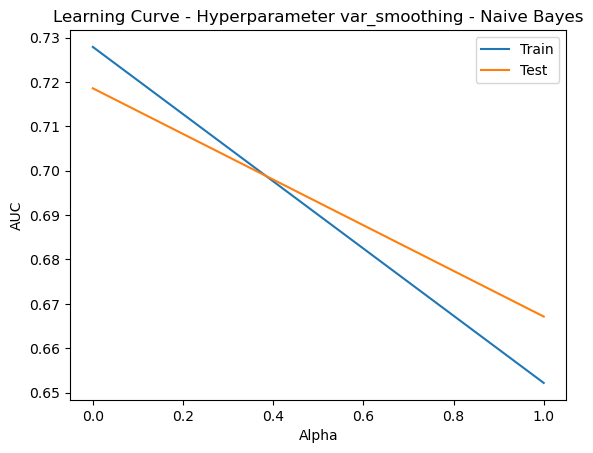

In [347]:
# Gambar learning curve dataset 2

def draw_learning_curve_nb2(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = GaussianNB(var_smoothing=c) #ini bisa diutak-atik
        model.fit(Xs_train2, ys_train2)

        # eval on train
        ys_pred_train_proba = model.predict_proba(Xs_train2)
        train_auc = roc_auc_score(ys_train2, ys_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        ys_pred_proba = model.predict_proba(Xs_test2)
        test_auc = roc_auc_score(ys_test2, ys_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('Alpha')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter var_smoothing - Naive Bayes')
    plt.legend()
    plt.show()
    

param_values = [int(x) for x in np.linspace(0, 1, 25)] #ini bisa diutak atik
draw_learning_curve_nb2(param_values)

Berdasarkan gambar learning curve yang didapat, nilai AUC data train berada di atas nilai AUC data test dengan nilai alpha kurang dari 0.5, dengan demikian coba kita iterasikan nilai alpha antara 0-0.5 pada tuning hyperpamater

In [348]:
# hypertuning parameter model naive bayes pada dataset 1

from sklearn.model_selection import RandomizedSearchCV

nb = GaussianNB()
a = [float(x) for x in np.linspace(0.0001, 0.5, 100)] # buat 100 iterasi antara 0.0001 sampai 0.05
hyperparameters = dict(var_smoothing = a)
rsnb = RandomizedSearchCV(nb, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
eval_classification_df1(rsnb, nb_scaler)

Accuracy (Train Set): 0.65
Accuracy (Test Set): 0.64
Precision (Train Set): 0.74
Precision (Test Set): 0.74
Recall (Train Set): 0.63
Recall (Test Set): 0.63
F1-Score (Train Set): 0.68
F1-Score (Test Set): 0.68
roc_auc (train-proba): 0.73
roc_auc (test-proba): 0.72
roc_auc (crossval train): 0.7305376162922638
roc_auc (crossval test): 0.7031930154284598


In [349]:
# hypertuning parameter model naive bayes pada dataset 2

eval_classification_df2(rsnb, nb_scaler)

Accuracy (Train Set): 0.65
Accuracy (Test Set): 0.64
Precision (Train Set): 0.74
Precision (Test Set): 0.74
Recall (Train Set): 0.62
Recall (Test Set): 0.63
F1-Score (Train Set): 0.68
F1-Score (Test Set): 0.68
roc_auc (train-proba): 0.73
roc_auc (test-proba): 0.72
roc_auc (crossval train): 0.7277852996092282
roc_auc (crossval test): 0.7034594664215732


Dari hasil tuning parameter, tidak terlihat perubahan yang signifikan. Dengan demikian model dianggap sudah best-fit dengan hasil terbaik berada pada dataset 2 dimana nilai roc_auc (crossval test) sedikit lebih tinggi dibanding dengan dataset 1.

<b> Feature Importance Naive Bayes </b> <br>

Naive Bayes tidak memiliki feature importance karena semua feature dianggap independen sehingga skala dan distribusi tiap fitur diasumsikan tidak memempengaruhi satu sama lain.

#  XGBoost

In [350]:
! python -m pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 882.0 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


<b> Dataset 1 

In [351]:
from xgboost import XGBClassifier

# evaluasi model XGBoost menggunakan dataset 1

xgb = XGBClassifier()
xgb_scaller = StandardScaler() 
eval_classification_df1(xgb,xgb_scaller)

Accuracy (Train Set): 0.93
Accuracy (Test Set): 0.66
Precision (Train Set): 0.97
Precision (Test Set): 0.75
Recall (Train Set): 0.91
Recall (Test Set): 0.65
F1-Score (Train Set): 0.94
F1-Score (Test Set): 0.70
roc_auc (train-proba): 0.98
roc_auc (test-proba): 0.74
roc_auc (crossval train): 0.971877271104978
roc_auc (crossval test): 0.7292180664219953


Model terindikasi overfit, maka akan dilakukan hyperparameter tuning

In [352]:
#hyperparameter tuning untuk dataset 1 

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(3, 4, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(44, 45, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(1, 2.7, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(1.5, 2, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(1.5, 2, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb_tuned = RandomizedSearchCV(xgb, hyperparameters, cv=5, random_state=42, scoring='roc_auc')

# Predict & Evaluation
eval_classification_df1(xgb_tuned,xgb_scaller)

Accuracy (Train Set): 0.69
Accuracy (Test Set): 0.69
Precision (Train Set): 0.92
Precision (Test Set): 0.92
Recall (Train Set): 0.52
Recall (Test Set): 0.52
F1-Score (Train Set): 0.66
F1-Score (Test Set): 0.67
roc_auc (train-proba): 0.77
roc_auc (test-proba): 0.74
roc_auc (crossval train): 0.7783747605833665
roc_auc (crossval test): 0.7246246671005021


Model sudah lebih baik  daripada sebelumnya dan bisa diterima karena perbedaan nilai roc_auc < 0.1 / 10%

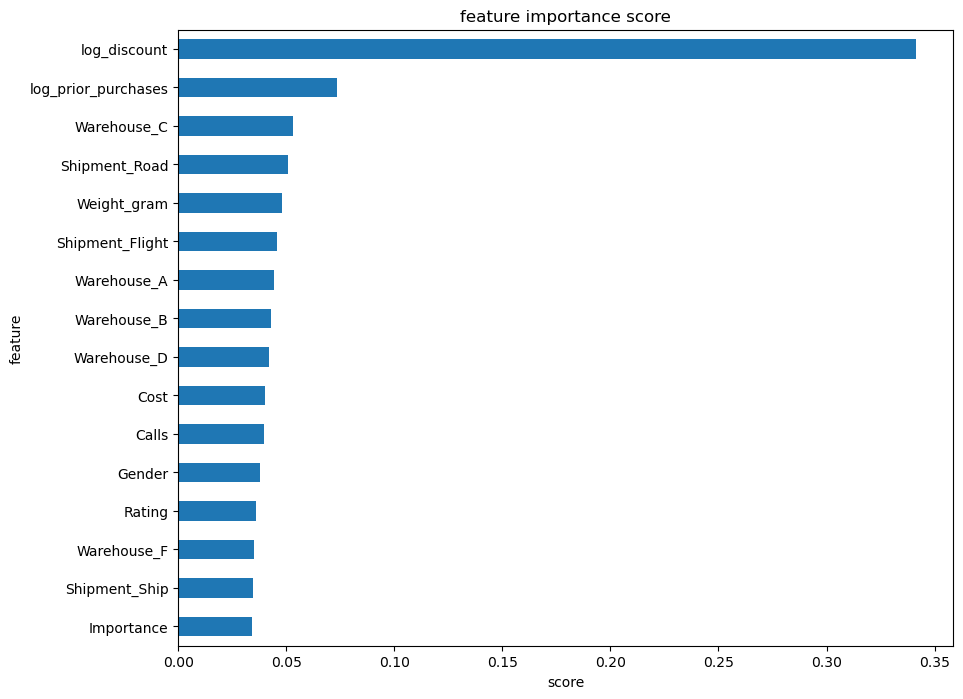

In [384]:
# fitur importance pada dataset 1

show_feature_importance_df1(xgb, xgb_scaller)

<b> Dataset 2

In [353]:
from xgboost import XGBClassifier

# evaluasi model XGBoost menggunakan dataset 2

xgb = XGBClassifier()
xgb_scaller = StandardScaler() 
eval_classification_df2(xgb,xgb_scaller)

Accuracy (Train Set): 0.88
Accuracy (Test Set): 0.66
Precision (Train Set): 0.94
Precision (Test Set): 0.75
Recall (Train Set): 0.86
Recall (Test Set): 0.66
F1-Score (Train Set): 0.90
F1-Score (Test Set): 0.70
roc_auc (train-proba): 0.96
roc_auc (test-proba): 0.75
roc_auc (crossval train): 0.9549995149338389
roc_auc (crossval test): 0.7363117640973055


Model terindikasi overfit, maka akan dilakukan hyperparameter tuning

In [354]:
#hyperparameter tuning untuk dataset 2 

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(3, 4, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(40, 45, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(2, 2.5, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(1.5, 2, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(1.5, 2, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb_tuned = RandomizedSearchCV(xgb, hyperparameters, cv=5, random_state=42, scoring='roc_auc')

# Predict & Evaluation
eval_classification_df2(xgb_tuned,xgb_scaller)

Accuracy (Train Set): 0.69
Accuracy (Test Set): 0.68
Precision (Train Set): 0.91
Precision (Test Set): 0.91
Recall (Train Set): 0.53
Recall (Test Set): 0.53
F1-Score (Train Set): 0.67
F1-Score (Test Set): 0.67
roc_auc (train-proba): 0.77
roc_auc (test-proba): 0.75
roc_auc (crossval train): 0.779321182997009
roc_auc (crossval test): 0.7256584981063929


Model sudah lebih baik  daripada sebelumnya dan bisa diterima karena perbedaan nilai roc_auc < 0.1 / 10%. Dengan Demikian hasil terbaik didapat pada model dataset 2 yang telah dituning.

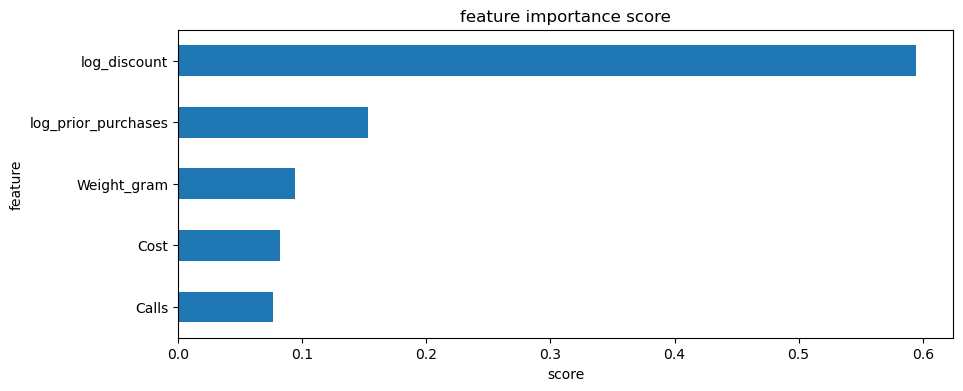

In [385]:
# fitur importance pada dataset 2

show_feature_importance_df2(xgb, xgb_scaller)

#  ADABOOST

In [356]:
# Model Adaboost menggunakan dataset 1

from sklearn.ensemble import AdaBoostClassifier
clfs = AdaBoostClassifier()
clfs_scaler = StandardScaler()
eval_classification_df1(clfs, clfs_scaler)

Accuracy (Train Set): 0.68
Accuracy (Test Set): 0.68
Precision (Train Set): 0.81
Precision (Test Set): 0.80
Recall (Train Set): 0.61
Recall (Test Set): 0.61
F1-Score (Train Set): 0.70
F1-Score (Test Set): 0.69
roc_auc (train-proba): 0.77
roc_auc (test-proba): 0.75
roc_auc (crossval train): 0.7652898693509448
roc_auc (crossval test): 0.7207784354663864


In [357]:
# Model Adaboost menggunakan dataset 2

eval_classification_df2(clfs, clfs_scaler)

Accuracy (Train Set): 0.68
Accuracy (Test Set): 0.68
Precision (Train Set): 0.79
Precision (Test Set): 0.80
Recall (Train Set): 0.62
Recall (Test Set): 0.63
F1-Score (Train Set): 0.70
F1-Score (Test Set): 0.70
roc_auc (train-proba): 0.76
roc_auc (test-proba): 0.75
roc_auc (crossval train): 0.7635094420078546
roc_auc (crossval test): 0.718943747716141


Hasil evaluasi model Adaboost diatas sudah cukup best-fit dengan perbedaan roc_auc data train dan data test dibawah 0.1. Hasil terbaik didapat dari dataset pertama. Selanjutnya akan ditampilkan fitur importance dari kedua dataset

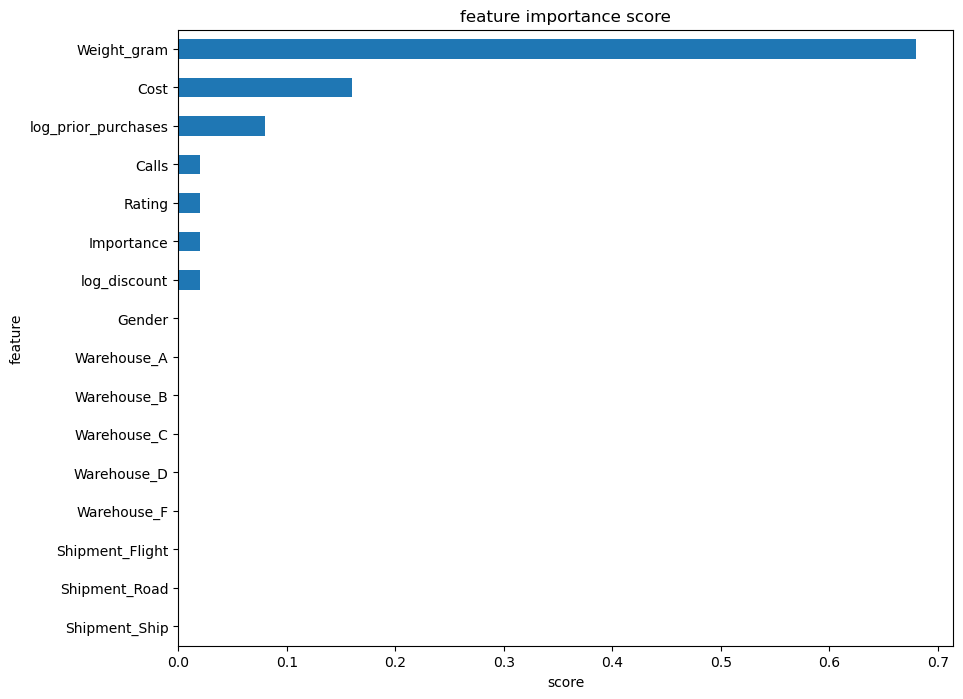

In [381]:
# fitur importance pada dataset 1

show_feature_importance_df1(clfs, clfs_scaler)

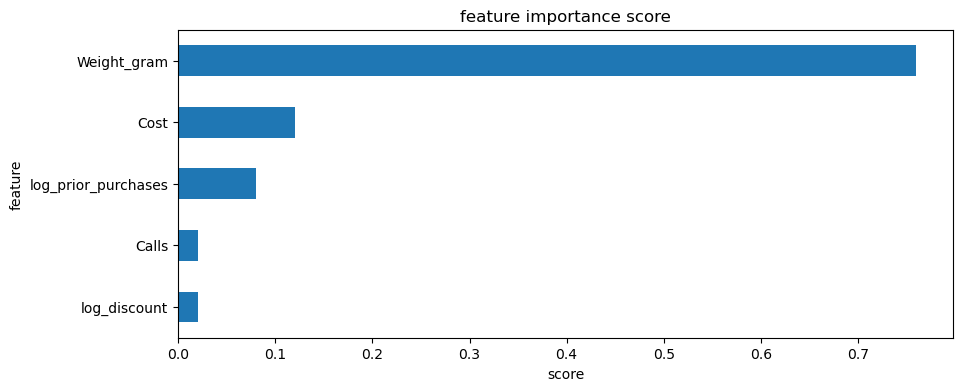

In [382]:
# fitur importance pada dataset 2

show_feature_importance_df2(clfs, clfs_scaler)

## random forest

In [393]:
# evaluasi model random forest menggunakan dataset 1

from sklearn.ensemble import RandomForestClassifier # import random forest dari sklearn
rf = RandomForestClassifier(random_state=42) # inisiasi object dengan nama rf
rf_scaler = StandardScaler()
eval_classification_df1(rf, rf_scaler)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.66
Precision (Train Set): 1.00
Precision (Test Set): 0.76
Recall (Train Set): 1.00
Recall (Test Set): 0.64
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.70
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.74
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.7274872949997846


In [394]:
# evaluasi model random forest menggunakan dataset 2

eval_classification_df2(rf, rf_scaler)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.67
Precision (Train Set): 1.00
Precision (Test Set): 0.75
Recall (Train Set): 1.00
Recall (Test Set): 0.67
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.71
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.75
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.7346606840450641


Berdasarkan evaluasi model di atas, model masih terlalu overfitting, selanjutnya perlu dilakukan tuning hyperparameter

In [396]:
# tuning hyperparameter RF
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rfs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
eval_classification_df1(rfs, rf_scaler)

Accuracy (Train Set): 0.72
Accuracy (Test Set): 0.68
Precision (Train Set): 0.96
Precision (Test Set): 0.91
Recall (Train Set): 0.56
Recall (Test Set): 0.53
F1-Score (Train Set): 0.71
F1-Score (Test Set): 0.67
roc_auc (train-proba): 0.87
roc_auc (test-proba): 0.74
roc_auc (crossval train): 0.9051831085783467
roc_auc (crossval test): 0.7241449399093328


In [397]:
eval_classification_df2(rfs, rf_scaler)

Accuracy (Train Set): 0.79
Accuracy (Test Set): 0.68
Precision (Train Set): 0.93
Precision (Test Set): 0.83
Recall (Train Set): 0.69
Recall (Test Set): 0.60
F1-Score (Train Set): 0.79
F1-Score (Test Set): 0.69
roc_auc (train-proba): 0.90
roc_auc (test-proba): 0.75
roc_auc (crossval train): 0.9052863302147769
roc_auc (crossval test): 0.733605791492692


Model masih overfitting, selanjutnya coba cek learning curve

param value: 1; train: 0.8569919467125655; test: 0.637395255680424
param value: 1; train: 0.8575694604787193; test: 0.6430580433822447
param value: 1; train: 0.8595993646928766; test: 0.6186217917259655
param value: 1; train: 0.8650327798884715; test: 0.6292012747214998
param value: 1; train: 0.863939883713608; test: 0.6174255901261226
param value: 1; train: 0.8670823800228095; test: 0.6269376932325662
param value: 1; train: 0.8667425816698503; test: 0.6225776917603181
param value: 1; train: 0.8666022263736418; test: 0.6476687871129214
param value: 2; train: 0.9456000783638743; test: 0.6791444168057124
param value: 2; train: 0.9468506118679288; test: 0.6890487360136428
param value: 2; train: 0.939089439768267; test: 0.6844347334004024
param value: 2; train: 0.9425541725264652; test: 0.690997356087746
param value: 2; train: 0.9440522519118686; test: 0.6757870009692301
param value: 2; train: 0.9460894677553648; test: 0.6833339978897777
param value: 2; train: 0.9387457931893397; test: 0.6

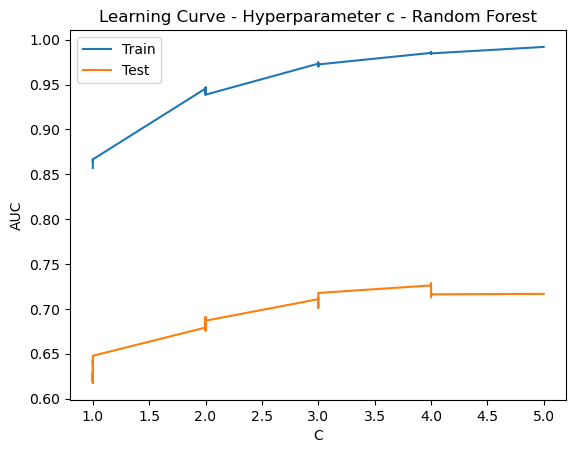

In [405]:
# Gambar learning curve model random forest dataset 1

# param_values = [int(x) for x in np.linspace(1, 5, 10)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

def draw_learning_curve_df1_rf(param_values, scaler):
    train_scores = []
    test_scores = []
    
    X_train_scaled1 = scaler.fit_transform(Xs_train1) # fit dan transform data train
    X_test_scaled1 = scaler.transform(Xs_test1) # transform data test menggunakan scaler yang sama

    for c in param_values:
        model = RandomForestClassifier(n_estimators=c) #cek param n estimator
        model.fit(X_train_scaled1, ys_train1)

        # eval on train
        ys_pred_train_proba = model.predict_proba(X_train_scaled1)
        train_auc = roc_auc_score(ys_train1, ys_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        ys_pred_proba = model.predict_proba(X_test_scaled1)
        test_auc = roc_auc_score(ys_test1, ys_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter c - Random Forest')
    plt.legend()
    plt.show()
    
rf_scaler = StandardScaler()
param_values = [int(x) for x in np.linspace(1, 5, 30)] # n_estimators
draw_learning_curve_df1_rf(param_values, rf_scaler)

param value: 1; train: 0.8603213968360585; test: 0.629574704323502
param value: 1; train: 0.8601804817978912; test: 0.6289651015851204
param value: 1; train: 0.8646935412774711; test: 0.635741276929872
param value: 1; train: 0.8673212149199219; test: 0.6467240945674044
param value: 1; train: 0.8676754266283243; test: 0.6352374920253228
param value: 1; train: 0.8632727762501486; test: 0.6403060129067086
param value: 1; train: 0.868042127579186; test: 0.6289720027481964
param value: 1; train: 0.8665084695955164; test: 0.629414443980959
param value: 2; train: 0.9421431120253563; test: 0.6920794967978603
param value: 2; train: 0.9425650874946649; test: 0.6761477784389263
param value: 2; train: 0.943921132357983; test: 0.685254054816705
param value: 2; train: 0.9403108317065831; test: 0.6776552991730873
param value: 2; train: 0.9371778160268116; test: 0.6761613890661039
param value: 2; train: 0.9426413873204452; test: 0.6924285806301222
param value: 2; train: 0.9450313805335739; test: 0.694

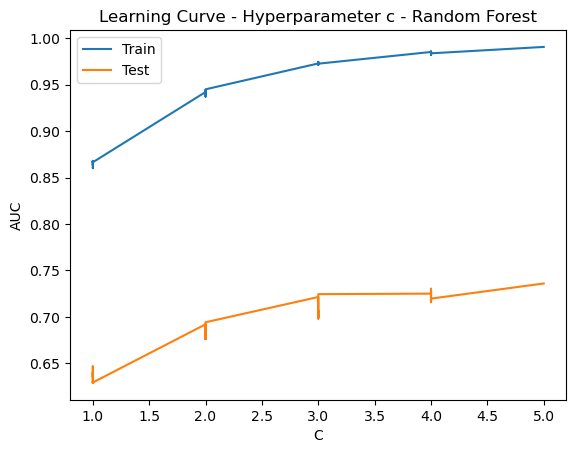

In [406]:
# Gambar learning curve model random forest dataset 2

# param_values = [int(x) for x in np.linspace(1, 5, 10)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

def draw_learning_curve_df2_rf(param_values, scaler):
    train_scores = []
    test_scores = []
    
    X_train_scaled2 = scaler.fit_transform(Xs_train2) # fit dan transform data train
    X_test_scaled2 = scaler.transform(Xs_test2) # transform data test menggunakan scaler yang sama

    for c in param_values:
        model = RandomForestClassifier(n_estimators=c) #cek param n estimator
        model.fit(X_train_scaled2, ys_train2)

        # eval on train
        ys_pred_train_proba = model.predict_proba(X_train_scaled2)
        train_auc = roc_auc_score(ys_train2, ys_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        ys_pred_proba = model.predict_proba(X_test_scaled2)
        test_auc = roc_auc_score(ys_test2, ys_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter c - Random Forest')
    plt.legend()
    plt.show()
    
rf_scaler = StandardScaler()
param_values = [int(x) for x in np.linspace(1, 5, 30)] # n_estimators
draw_learning_curve_df2_rf(param_values, rf_scaler)

indikasi best fit terjadi pada c = 5, masukan nilai c = 5 pada parameter n_estimators. selanjutnya coba tuning pada parameter max_depth

param value: 1; train: 0.7337704918032787; test: 0.74013152850027
param value: 1; train: 0.7360432540598784; test: 0.7390873441870737
param value: 1; train: 0.7376170035613582; test: 0.7415625613436718
param value: 2; train: 0.723499926533868; test: 0.7013333813858763
param value: 2; train: 0.7463203613134345; test: 0.7335901843990774
param value: 3; train: 0.7536728518153132; test: 0.7502522758502234
param value: 3; train: 0.7541980996760493; test: 0.7405436812950876
param value: 4; train: 0.7488700559042282; test: 0.7442072403935811
param value: 4; train: 0.7510675678512208; test: 0.7332395669750209
param value: 5; train: 0.7667564352833344; test: 0.741935990945674
param value: 5; train: 0.7659786038636189; test: 0.7399561239387544
param value: 6; train: 0.7865258565801165; test: 0.7320966576900427
param value: 6; train: 0.7831349747766281; test: 0.7387210074471218
param value: 7; train: 0.8016958782001496; test: 0.7342795339107817
param value: 7; train: 0.8113896293808555; test: 0.7

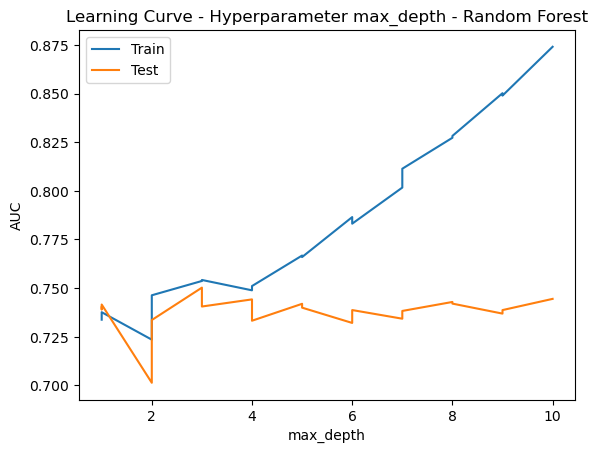

In [415]:
# Gambar learning curve model random forest dataset 1

# param_values = [int(x) for x in np.linspace(1, 5, 10)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

def draw_learning_curve_df1_rfs(param_values, scaler):
    train_scores = []
    test_scores = []
    
    X_train_scaled1 = scaler.fit_transform(Xs_train1) # fit dan transform data train
    X_test_scaled1 = scaler.transform(Xs_test1) # transform data test menggunakan scaler yang sama

    for c in param_values:
        model = RandomForestClassifier(n_estimators= 5, max_depth = c) #cek param n estimator
        model.fit(X_train_scaled1, ys_train1)

        # eval on train
        ys_pred_train_proba = model.predict_proba(X_train_scaled1)
        train_auc = roc_auc_score(ys_train1, ys_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        ys_pred_proba = model.predict_proba(X_test_scaled1)
        test_auc = roc_auc_score(ys_test1, ys_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('max_depth')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter max_depth - Random Forest')
    plt.legend()
    plt.show()
    
rf_scaler = StandardScaler()
param_values = [int(x) for x in np.linspace(1, 10, 20)] # max_depth
draw_learning_curve_df1_rfs(param_values, rf_scaler)

param value: 1; train: 0.7316060046318648; test: 0.7405016992197084
param value: 1; train: 0.7427332899533314; test: 0.7426671308337833
param value: 1; train: 0.7144006213135744; test: 0.6956512320876479
param value: 2; train: 0.7469741049376238; test: 0.7474005619080335
param value: 2; train: 0.7389066140509226; test: 0.7526665327329833
param value: 3; train: 0.7520970032814871; test: 0.7415849901236689
param value: 3; train: 0.7542488962588246; test: 0.7501736792707463
param value: 4; train: 0.7559065021025307; test: 0.7393758511434461
param value: 4; train: 0.7650616765671026; test: 0.7434001877116357
param value: 5; train: 0.7741721066588303; test: 0.7513457267998233
param value: 5; train: 0.7664652295291872; test: 0.7359563248392796
param value: 6; train: 0.7851061760528396; test: 0.7368523258453157
param value: 6; train: 0.7823258327910834; test: 0.745116852026795
param value: 7; train: 0.8037723109646453; test: 0.7421683301025668
param value: 7; train: 0.7946746499863564; test: 

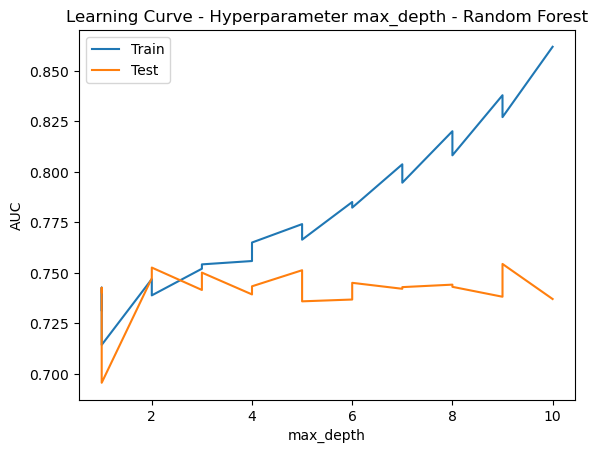

In [416]:
# Gambar learning curve model random forest dataset 2

# param_values = [int(x) for x in np.linspace(1, 5, 10)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

def draw_learning_curve_df2_rfs(param_values, scaler):
    train_scores = []
    test_scores = []
    
    X_train_scaled2 = scaler.fit_transform(Xs_train2) # fit dan transform data train
    X_test_scaled2 = scaler.transform(Xs_test2) # transform data test menggunakan scaler yang sama

    for c in param_values:
        model = RandomForestClassifier(n_estimators= 5, max_depth = c) #cek param n estimator
        model.fit(X_train_scaled2, ys_train2)

        # eval on train
        ys_pred_train_proba = model.predict_proba(X_train_scaled2)
        train_auc = roc_auc_score(ys_train2, ys_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        ys_pred_proba = model.predict_proba(X_test_scaled2)
        test_auc = roc_auc_score(ys_test2, ys_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('max_depth')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter max_depth - Random Forest')
    plt.legend()
    plt.show()
    
rf_scaler = StandardScaler()
param_values = [int(x) for x in np.linspace(1, 10, 20)] # max_depth
draw_learning_curve_df2_rfs(param_values, rf_scaler)

pada dataset 1, indikasi max_depth optimum pada nilai = 4, dan pada dataset 2 max_depth optimum = 5.

In [420]:
# tuning hyperparameter RF dataset 1

n_estimators = [5]
criterion = ['gini', 'entropy']
max_depth = [4]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]

hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rfs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
eval_classification_df1(rfs, rf_scaler)

Accuracy (Train Set): 0.68
Accuracy (Test Set): 0.68
Precision (Train Set): 0.79
Precision (Test Set): 0.80
Recall (Train Set): 0.62
Recall (Test Set): 0.62
F1-Score (Train Set): 0.70
F1-Score (Test Set): 0.70
roc_auc (train-proba): 0.76
roc_auc (test-proba): 0.75
roc_auc (crossval train): 0.7594690793896525
roc_auc (crossval test): 0.7181552829330478


model dengan dataset 1 sudah bestfit

In [421]:
# tuning hyperparameter RF dataset 2

n_estimators = [5]
criterion = ['gini', 'entropy']
max_depth = [5]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]

hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rfs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
eval_classification_df2(rfs, rf_scaler)

Accuracy (Train Set): 0.69
Accuracy (Test Set): 0.68
Precision (Train Set): 0.94
Precision (Test Set): 0.92
Recall (Train Set): 0.51
Recall (Test Set): 0.51
F1-Score (Train Set): 0.66
F1-Score (Test Set): 0.66
roc_auc (train-proba): 0.77
roc_auc (test-proba): 0.74
roc_auc (crossval train): 0.7691410432217526
roc_auc (crossval test): 0.7249602256826777


model dengan dataset 2 sudah bestfit

Berikut feature importance dari dataset 1 dan 2 untuk model random forest

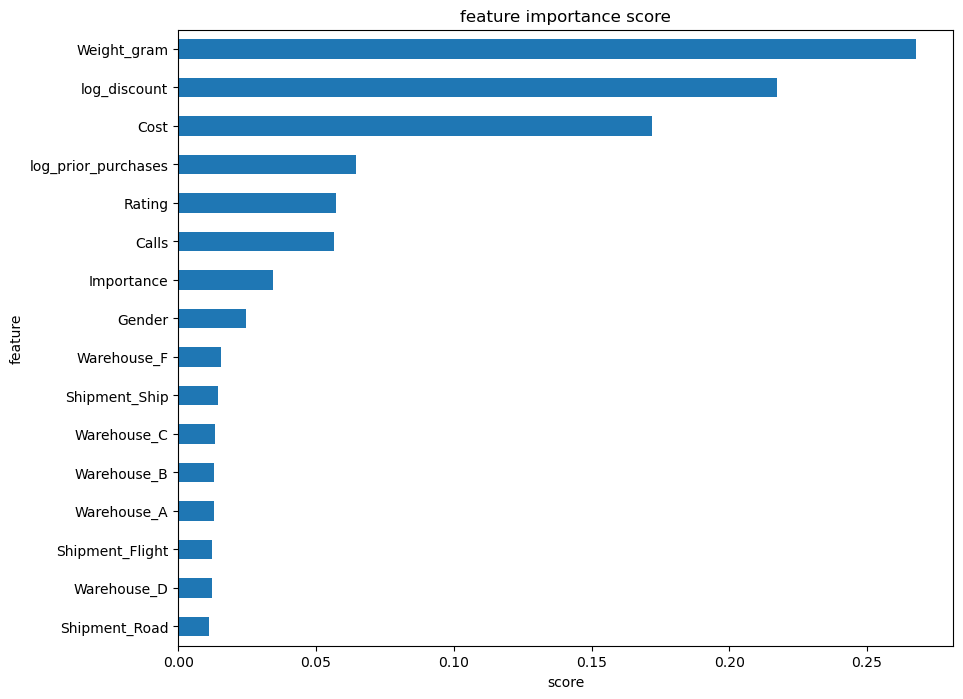

In [423]:
show_feature_importance_df1(rf, rf_scaler)

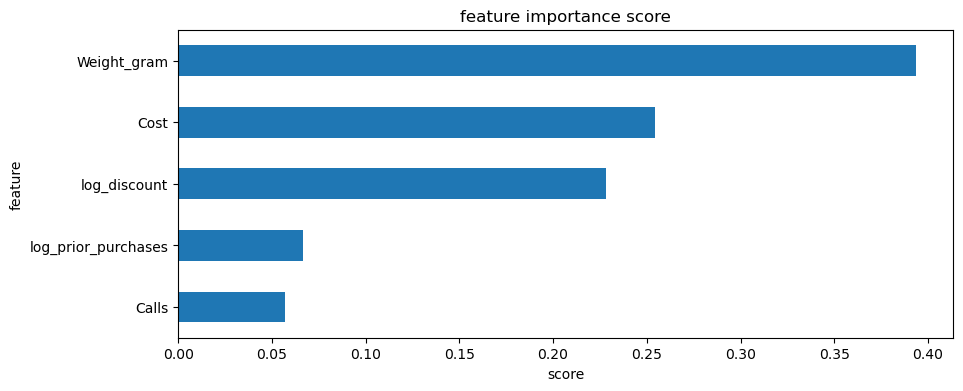

In [424]:
show_feature_importance_df2(rf, rf_scaler)

# SHAP Values Feature Importances

In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.5/436.5 kB 1.3 MB/s eta 0:00:0000:0100:01
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 1.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pytz
    Found existing installation: pytz 2019.3
    Uninstalling pytz-2019.3:
      Successfully uninstalled pytz-2019.3
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.7.3
    Uninstalling python-dateutil-2.7.3:
      Successfully uninstalled python-dateutil-2.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1

Menampilkan SHAP Value pada model yang dipilih

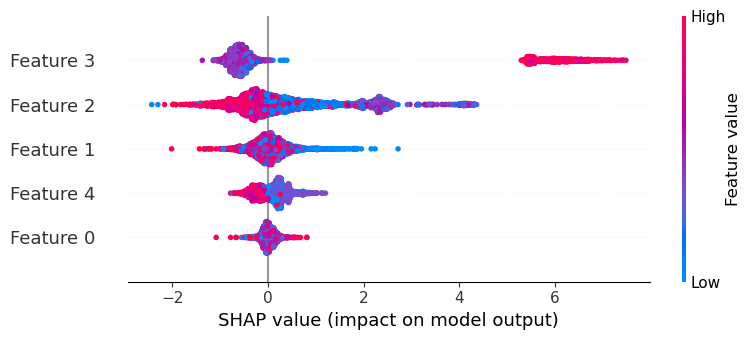

In [72]:
from xgboost import XGBClassifier
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # import standard scaler dari sklearn

Xs_train1, Xs_test1, ys_train1, ys_test1 = train_test_split(Xs1, ys1, test_size=0.3, random_state=42)
Xs_train2, Xs_test2, ys_train2, ys_test2 = train_test_split(Xs2, ys2, test_size=0.3, random_state=42)

scaler = StandardScaler() # membuat objek StandardScaler
X_train_scaled2 = scaler.fit_transform(Xs_train2) # fit dan transform data train
X_test_scaled2 = scaler.transform(Xs_test2) # transform data test menggunakan scaler yang sama

# train XGBoost model
model = XGBClassifier()
# model = xgb.train({"learning_rate": 0.01}, xgb.DMatrix(X_train_scaled2, label=ys_train2), 100)
model.fit(X_train_scaled2, ys_train2)

# explain model predictions using SHAP values
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test_scaled2)

shap.summary_plot(shap_values, X_test_scaled2) # Summary shap value terhadap label positive

In [69]:
Xs_train2.columns

Index(['Calls', 'Cost', 'Weight_gram', 'log_discount', 'log_prior_purchases'], dtype='object')